<a href="https://colab.research.google.com/github/bryansb/simulacion/blob/main/Unidad1/Tarea6_Autocorrelacion_SarmientoBryan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 06 - Autocorrelación: Prueba de Aleatoriedad o Independencia
- **Nombre:** Sarmiento Basurto Douglas Bryan
- **Asignatura:** Simulación

## Importación de paquetes

### Paquetes

In [1]:
import numpy as np
import pandas as pd 
import math

import matplotlib.pyplot as plt

# import sklearn.metrics as metrics
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Carga del Dataset

In [2]:
path = './forestfires.csv'

data = pd.read_csv(path, header=0, delimiter=',')
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## Ejercicio 1 - Covarianza

### Funciones

In [3]:
def get_cov(var1, var2):
    return np.cov(var1, var2)[0][1]

### Covarianza entre la variable viento (wind) y humedad relativa (rH)

In [4]:
wind = data['wind'].values
rH = data['RH'].values

cov = get_cov(wind, rH)
print(f'La covarianza entre WIND y RH, es: {cov}')

La covarianza entre WIND y RH, es: 2.0292197082152543


### Gráfico de dispersión

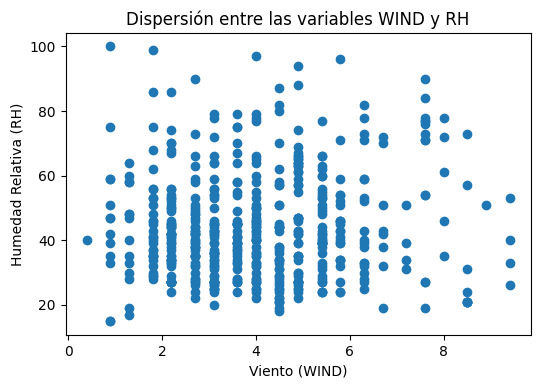

In [5]:
fig = plt.figure(dpi=100)
plt.scatter(wind, rH)
plt.xlabel('Viento (WIND)')
plt.ylabel('Humedad Relativa (RH)')
plt.title('Dispersión entre las variables WIND y RH')
plt.show()

### Conclusiones

Según el resultado de la covarianza (2.03), se tendría que entre las variables viento (wind) y humedad relativa (RH) existe una relación lineal directa o positiva. Sin embargo, hay que tener en cuenta que la covarianza por sí sola no puede representar de manera cuantitativa la intensidad de esa relación.

Es por eso, que al generar la gráfica de dispersión, se puede observar que en realidad no hay una relación débil o fuerte entre las dos variables.

## Ejercicio 2 - Correlación de Pearson

### Funciones

In [6]:
def get_corr_pearson(var1, var2):
    return np.corrcoef(wind, rH)[0][1]

### Correlación lineal de Pearson entre la variable viento (wind) y humedad relativa (rH)

In [7]:
pearson = get_corr_pearson(wind, rH)
print(f'La correlación de Pearson entre WIND y RH, es: {pearson}')

La correlación de Pearson entre WIND y RH, es: 0.06941006715607252



### Regresión Lineal

In [8]:
# Se definen los parámetros de entrada
X = data[['wind']]
y = data['RH']

# Se realiza el split del dataset en TEST y TRAIN
X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1,
                                        shuffle      = True
                                    )

# Se ejecuta el modelo
linearRegressionModel = LinearRegression()
linearRegressionModel.fit(X = X_train.reshape(-1, 1), y = y_train)

print("Coeficiente:", list(zip(X.columns, linearRegressionModel.coef_.flatten(), )))

# Se evalúa el modelo
prediction = linearRegressionModel.predict(X = X_test)
r2 = r2_score(
    y_true  = y_test,
    y_pred  = prediction,
)

print(f"El R-Cuadrado del test es: {r2}")

Coeficiente: [('wind', 0.40456746051896747)]
El R-Cuadrado del test es: -0.008049889584388126


### Conclusiones

Complementando a los resultados obtenidos del primer ejercicio, se calculó la Correlación de Pearson. Esta correlación comprende valores entre -1 y 1. En este caso, el valor obtenido fue de 0.07, lo que indicaría una correlación positiva, pero no significativa, ya que se acerca más a cero que a uno.

Por otro lado, al realizar la regresión lineal, obtenemos un coeficiente de "0.4". Esto nos indicaría de igual forma que, mientras la variable predictora crece, igualmente lo hará la variable respuesta. Sin embargo, el cálculo de R-Cuadrado nos da un número negativo, lo cuál indicaría que el modelo como tal se ajusta mal a los datos, y esto se debe a que no hay una relación lineal clara entre las variables wind y RH.

## Ejercicio 3 - Autocorrelación

Aplicar el test de autocorrelación de 100 números 
generados por:
* Productos medios (X0=7363423178943, 
X1=1324356789532, D=7)

* Cuadrados medios (X0=7363423178943)

* Congruencias lineales

* Tausworthe


Deberá indicar si los números tienen autocorrelación 
o no, y especificar el valor calculado, así como las 
conclusiones y su correspondiente gráfica de 
dispersión.


### Funciones: Autocorrelación

In [29]:
def calculate_m(m, i, N):
    return math.trunc((N-i)/m) - 1
    # return math.trunc((N-i)/m) 

def estimator(i, m, M, numbers):
    sum = 0
    i = i - 1

    for k in range(0, M+1, 1):
        sum += numbers[i+k*m] * numbers[i+((k+1)*m)]

    div = sum / (M + 1)
    res = div - 0.25

    return res

def standard_deviation(M):
    up = math.sqrt((13 * M) + 7)
    down = 12 * (M + 1)

    div = up/down

    return div

def autocorrelation_test(m, i, N, M, numbers):
    approved = 'NO'

    est = estimator(i, m, M, numbers)
    st_dev = standard_deviation(M)
    result = est / st_dev

    if (result >= -1.96) and (result <= 1.96):
        approved = 'SI'

    return result, approved

def graph(numbers, title='', dpi=100):
    x_label = 'Iteración'
    y_label = 'Número Pseudoaleatorio'
    x = [i for i in range(100)]

    fig = plt.figure(dpi = dpi)
    plt.scatter(x, numbers)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

### Generador: Productos Medios

#### Funciones: Generador

In [10]:
def middle_products_generator(Xo=5015, X1=5734, n=4, iter=10, log=False):

    # Se comprueba que la condición de "n"
    if (n<=3):
        print('El valor de "n" debe ser mayor a 3')
        return -1

    numbers = []

    for i in range(iter):
        Yi = Xo*X1
        Txnn = str(Yi).zfill(8)
        size = len(Txnn)
        Ui = int(Txnn[int(size/2-n/2):int(size/2+n/2)])
        Rn = Ui / (int('9'*n)+1)
        numbers.append(Rn)

        if(log):
            print(str(i) + "\t" + str(Yi) + "\t"+ str(Ui)+"\t"+str(Rn))
            
        Xo = X1
        X1 = Ui
        
    return numbers

#### Autocorrelación

In [30]:
numbers_mpg = middle_products_generator(Xo = 7363423178943,
                                        X1 = 1324356789532,
                                        n = 7,
                                        iter = 100
)

m = 5
i = 2
N = len(numbers_mpg)

M = calculate_m(m, i, N)
result_mpg, approved = autocorrelation_test(m, i, N, M, numbers_mpg)
print(f'El resultado de la autocorrelación es {result_mpg}')
print(f'Por lo tanto, {approved} pasa la prueba de Aleatoriedad')

El resultado de la autocorrelación es 1.43983486420205
Por lo tanto, SI pasa la prueba de Aleatoriedad


#### Gráfica de dispersión

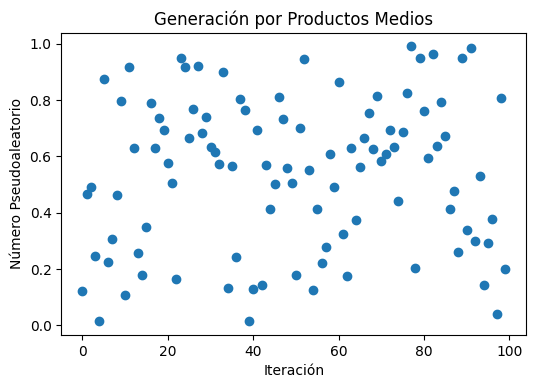

In [23]:
graph(numbers = numbers_mpg,
      title = 'Generación por Productos Medios'
)

### Generador: Cuadrados Medios

#### Funciones: Generador

In [13]:
def middle_square_generator(Xo=8370, n=4, iter=10, log=False):

    # Se comprueba que la condición de "n"
    if (n<=3):
        print('El valor de "n" debe ser mayor a 3')
        return -1

    Xn = Xo
    numbers = []

    for i in range(iter):
        Xnn = Xn**2
        Txnn = str(Xnn).zfill(8)
        size = len(Txnn)
        Ui = int(Txnn[int(size/2-n/2):int(size/2+n/2)])
        Rn = Ui / (int('9'*n)+1)
        numbers.append(Rn)

        if(log):
            print(str(i) + "\t" + str(Xn) + "\t"+ str(Ui)+"\t"+str(Rn))

        Xn = Ui
        
    return numbers

#### Autocorrelación

In [31]:
numbers_msg = middle_square_generator(Xo = 7363423178943,
                                      n = 7,
                                      iter = 100
)

m = 5
i = 2
N = len(numbers_msg)

M = calculate_m(m, i, N)
result_msg, approved  = autocorrelation_test(m, i, N, M, numbers_msg)
print(f'El resultado de la autocorrelación es {result_msg}')
print(f'Por lo tanto, {approved} pasa la prueba de Aleatoriedad')

El resultado de la autocorrelación es -0.7277444721319289
Por lo tanto, SI pasa la prueba de Aleatoriedad


#### Gráfica de dispersión

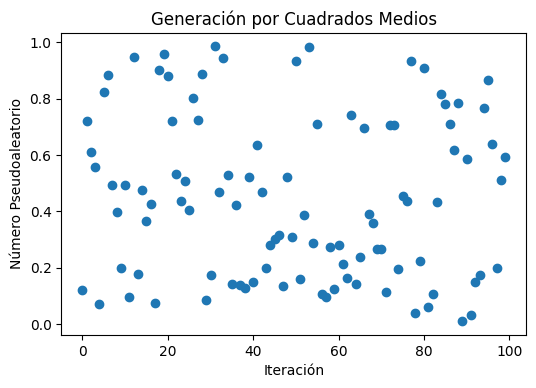

In [24]:
graph(numbers = numbers_msg,
      title = 'Generación por Cuadrados Medios'
)

### Generador: Congruencia Lineal

#### Funciones: Generador

In [16]:
def linear_congruential_generator(Xo=4370, a=3, b=5, m=19, iter=10, log=False):
    Xn = Xo
    numbers = []

    for i in range(iter):
        Xnn = (a*Xn+b) % m
        Ui = Xnn/m
        numbers.append(Ui)

        if (log):
            print(str(i) + "\t"+ str(Xnn)+"\t"+str(Ui))

        Xn = Xnn
    
    return numbers

#### Autocorrelación

In [39]:
numbers_lcg = linear_congruential_generator(Xo = 7,
                                            a = 74731897457, 
                                            b = 37747318974,
                                            m = 19, 
                                            iter = 100
)

m = 5
i = 2
N = len(numbers_lcg)

M = calculate_m(m, i, N)
result_lcg, approved = autocorrelation_test(m, i, N, M, numbers_lcg)
print(f'El resultado de la autocorrelación es {result_lcg}')
print(f'Por lo tanto, {approved} pasa la prueba de Aleatoriedad')

El resultado de la autocorrelación es -0.4512665119578127
Por lo tanto, SI pasa la prueba de Aleatoriedad


#### Gráfica de dispersión

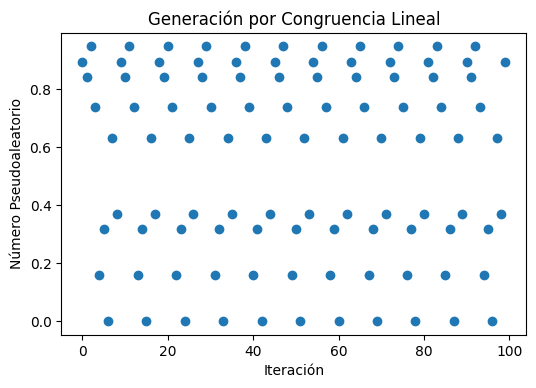

In [40]:
graph(numbers = numbers_lcg,
      title = 'Generación por Congruencia Lineal'
)

### Generador: Tausworthe

#### Funciones: Generador

In [19]:
def tausworthe_generator(seed=[1, 1, 1, 1, 1], r=3, q=5, l=4, n=10, period=True):
    binary_sequence = seed
    start = q

    if (period):
        end = (2**q)

    if (not period):
        end = n*l

    for i in range(start, end):
        bir = i-r
        biq = i-q
        bi = binary_sequence[bir] ^ binary_sequence[biq] # XOR
        binary_sequence.append(bi)

    numbers = get_decimal_numbers(binary_sequence, l, log=False)

    return numbers

def bin_to_dec(vec):
    bin = ''
    
    for i in vec:
        bin = bin + str(i)

    return int(bin, 2)

def get_decimal_numbers(seq, l, log=False):
    seq_dec = []
    e = l
    end = len(seq)
    const = 2**l

    for i in range(0, end, l):
        s = i
        dec = bin_to_dec(seq[s:e])
        num = dec/(const)
        seq_dec.append(num)

        if log:
            print(f'Binario: {seq[s:e]} = \
                    Decimal: {dec} | {dec} / {const} = {num} ')
            
        e = e + l

    return seq_dec

#### Autocorrelación

In [34]:
numbers_t = tausworthe_generator(seed = [1, 1, 1, 1, 1, 1, 1], 
                                  r = 3, 
                                  q = 7, 
                                  l = 5, 
                                  n = 100, 
                                  period=False
)

m = 5
i = 2
N = len(numbers_t)

M = calculate_m(m, i, N)
result_t, approved = autocorrelation_test(m, i, N, M, numbers_t)
print(f'El resultado de la autocorrelación es {result_t}')
print(f'Por lo tanto, {approved} pasa la prueba de Aleatoriedad')

El resultado de la autocorrelación es 1.840375611521749
Por lo tanto, SI pasa la prueba de Aleatoriedad


#### Gráfica de dispersión

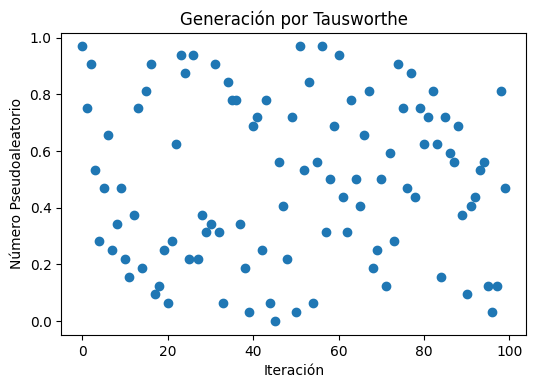

In [26]:
graph(numbers = numbers_t,
      title = 'Generación por Tausworthe'
)

### Conclusión

Los resultados de la prueba se basan en un valor, el nivel de significancia. Este, para este caso, se estableció entre -1.96 y 1.96. En ese contexto, todos los generadores pasaron la prueba. Sin embargo, cabe resaltar que el generador de Tausworthe fue el que está más próximo hacia el límite.

Por otro lado, el generador mediante congruencias lineales es el que más se aleja de los límites determinados. Para este, sin embargo, se puede notar un patrón en la gráfica de dispersión, contrario a los demás en donde los valores obtenidos se encuentran más dispersos y sin ningún patrón claramente visible.